In [1]:
!mkdir images

In [2]:
#importing the required Libraies for Data Preprocessing
import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

In [3]:
target=[]
images=[]
flat_data=[]

In [4]:
#copy in the [path for the image directory]
DATADIR='/content/images'

In [5]:
CATEGORIES=['Jeans','Sarees','trousers']

In [17]:

for category in CATEGORIES:
  class_num=CATEGORIES.index(category) #label encoding the values
  path=os.path.join(DATADIR,category) # create path to use all the imagess
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
     #print(img_array.shape)
    img_resized = resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)


flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images) 


In [21]:
flat_data[0]

array([0.85953159, 0.73391068, 0.74564924, ..., 0.96111111, 0.97455468,
       0.98293943])

<BarContainer object of 3 artists>

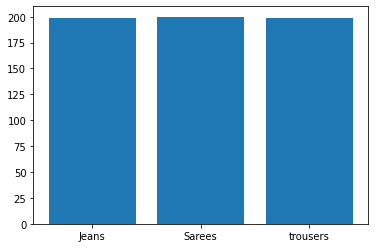

In [23]:
unique,count=np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [24]:
#split data in training and testing

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(flat_data,target,test_size=0.3,random_state=109)


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn  import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [28]:
y_pred=clf.predict(x_test)
y_pred

array([2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 0])

In [29]:
y_test

array([2, 2, 0, 1, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 2, 2, 0, 2, 0,
       1, 2, 1, 0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2,
       0, 1, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0, 1, 2, 2, 1, 0, 1, 2, 1, 0, 0,
       0, 2, 2, 0, 0, 2, 1, 1, 0, 2, 2, 1, 1, 1, 0, 1, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 1, 1, 2, 1, 2, 2, 1, 1, 0, 2, 2, 0, 2, 2, 1, 1, 0, 2, 0,
       2, 1, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2, 0, 1, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 0, 0, 0, 2, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 2, 0])

In [31]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [32]:
accuracy_score(y_pred,y_test)

1.0

In [33]:
confusion_matrix(y_pred,y_test)

array([[60,  0,  0],
       [ 0, 62,  0],
       [ 0,  0, 58]])

In [34]:
#save the modle by using pikle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [35]:
pickle.load(open('img_model.p','rb'))

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
#testing  brand new images
flat_data=[]
url=input('Enter your image url')
img =  imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out=model.predict(flat_data)
y_out=CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT:{y_out}')
